In [2]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from timeit import default_timer as timer

In [3]:
def getImage(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

In [4]:
def getgray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

In [5]:
def chaosDisplay(img, num):
    rows, cols, ch = img.shape
    n = rows
    display_img   = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            display_img  [x][y] = img[(x+y)%n][(x+2*y)%n]  
    return display_img   

In [6]:
def Encryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = chaosDisplay(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_enc.png", img)
    return img

In [39]:
def Decryption(imageName, key):
  start = timer()
  img = cv2.imread(imageName)
  rows, cols, ch = img.shape
  dimension = rows
  decrypt_it = dimension
  if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
      decrypt_it = 3*dimension
  elif 5**int(round(log(dimension,5))) == int(dimension):
      decrypt_it = 2*dimension
  elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
      decrypt_it = 2*dimension
  else:
      decrypt_it = int(12*dimension/7)
  for i in range(key,decrypt_it):
      img = chaosDisplay(img, i)
  cv2.imwrite(imageName.split('_')[0] + "_dec.png",img)
  #decryptionStarts = Decryption(image + "_enc.png", key)
  #decryptionStarts = Decryption(image1 + "_enc.png", key)
  end = timer()
  print("The Decryption Time", (end - start))
  return img
  

In [31]:
image = "originalImage"
ext = ".png"
key = 20

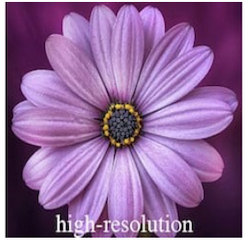

In [32]:
img = cv2.imread(image + ext)
cv2_imshow(img)
row,col=img.shape[0],img.shape[1]


In [10]:
row

250

In [11]:
col

275

Time taken for encryption 1.6249675589999697


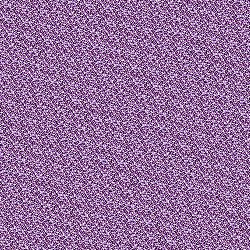

In [33]:
start = timer()
encryptionStarts =  Encryption(image + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

The Decryption Time 2.506905708999966


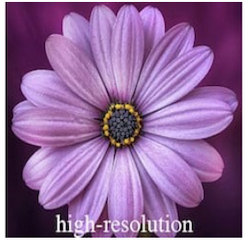

In [34]:

decryptionStarts = Decryption(image + "_enc.png", key)
cv2_imshow(decryptionStarts)

In [35]:
image1 = "flower"
ext = ".png"
key = 29

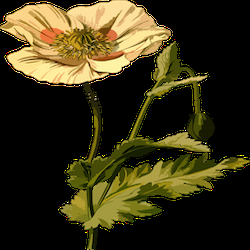

In [36]:
img = cv2.imread(image1 + ext)
cv2_imshow(img)

Time taken for encryption 2.3769591600000695


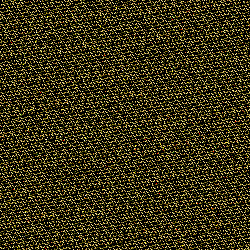

In [37]:
start = timer()
encryptionStarts =  Encryption(image1 + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

The Decryption Time 2.9202749629998834


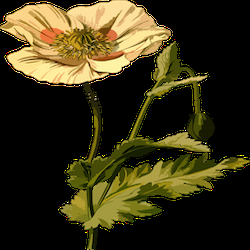

In [40]:
decryptionStarts = Decryption(image1 + "_enc.png", key)
cv2_imshow(decryptionStarts)

In [45]:
image2 = "scene"
ext = ".png"
key = 29

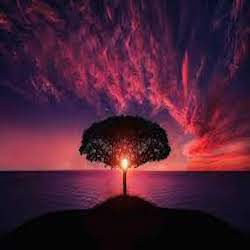

In [46]:
img = cv2.imread(image2 + ext)
cv2_imshow(img)

Time taken for encryption 2.346834313999807


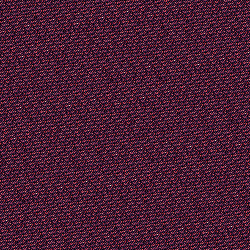

In [47]:
start = timer()
encryptionStarts =  Encryption(image2 + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

The Decryption Time 3.546536004000245


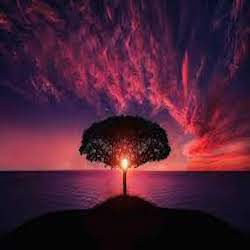

In [48]:
decryptionStarts = Decryption(image2 + "_enc.png", key)
cv2_imshow(decryptionStarts)

In [49]:
image3 = "amazon"
ext = ".png"
key = 29

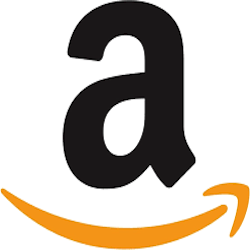

In [50]:
img = cv2.imread(image3 + ext)
cv2_imshow(img)

Time taken for encryption 2.3751794539998627


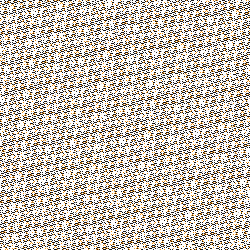

In [51]:
start = timer()
encryptionStarts =  Encryption(image3 + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

The Decryption Time 3.2571330910000142


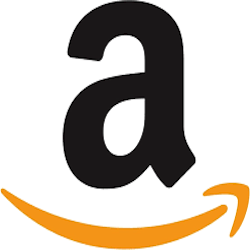

In [52]:
decryptionStarts = Decryption(image3 + "_enc.png", key)
cv2_imshow(decryptionStarts)

In [53]:
image4 = "dog"
ext = ".png"
key = 29

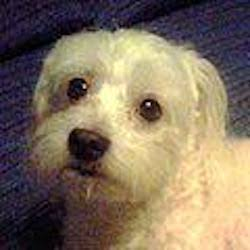

In [55]:
img = cv2.imread(image4 + ext)
cv2_imshow(img)

Time taken for encryption 2.3406282299997656


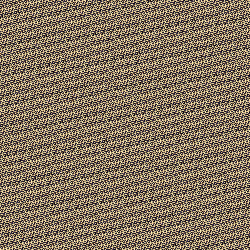

In [56]:
start = timer()
encryptionStarts =  Encryption(image4 + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

The Decryption Time 3.3384386890002133


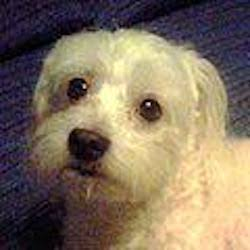

In [57]:
decryptionStarts = Decryption(image4 + "_enc.png", key)
cv2_imshow(decryptionStarts)

In [60]:
image5 = "docs"
ext = ".png"
key = 29

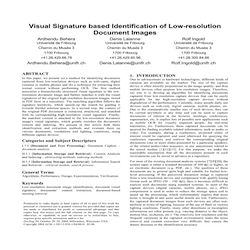

In [61]:
img = cv2.imread(image5 + ext)
cv2_imshow(img)

Time taken for encryption 2.362721148000219


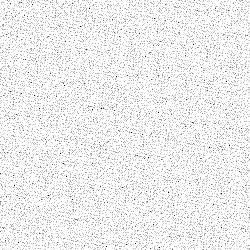

In [62]:
start = timer()
encryptionStarts =  Encryption(image5 + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

The Decryption Time 3.439133856000808


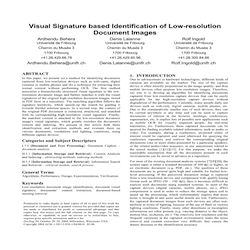

In [64]:
decryptionStarts = Decryption(image5 + "_enc.png", key)
cv2_imshow(decryptionStarts)

In [65]:
image6 = "our_campas"
ext = ".png"
key = 29

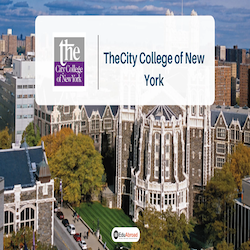

In [67]:
img = cv2.imread(image6 + ext)
cv2_imshow(img)

Time taken for encryption 2.3772787730003984


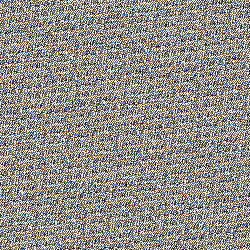

In [68]:
start = timer()
encryptionStarts =  Encryption(image6 + ext, key)
end = timer()
print("Time taken for encryption",(end - start))
cv2_imshow(encryptionStarts)

The Decryption Time 3.6433894270003293


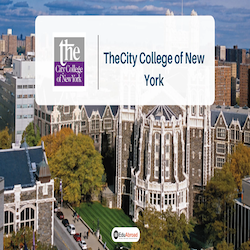

In [70]:
decryptionStarts = Decryption(image6 + "_enc.png", key)
cv2_imshow(decryptionStarts)